<a href="https://colab.research.google.com/github/VigneshR20/Customer_Conversion_Prediction/blob/main/CCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Requirement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Set

In [3]:
ccp = pd.read_csv('train.csv')

In [4]:
ccp

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [5]:
ccp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [6]:
ccp.shape

(45211, 11)

# Data Cleaning

In [7]:
ccp.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [8]:
ccp.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [9]:
ccp.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [10]:
ccp.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [11]:
ccp.age.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [12]:
ccp.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [13]:
ccp.job = ccp.job.replace('unknown', np.nan)

In [14]:
ccp.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [15]:
ccp.education_qual.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [16]:
ccp.education_qual = ccp.education_qual.replace('unknown', np.nan)

In [17]:
ccp.call_type.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [18]:
ccp.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [19]:
ccp.mon.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [20]:
ccp.dur.value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

In [21]:
ccp.num_calls.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [22]:
ccp.prev_outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [23]:
ccp.isnull().sum()

age                  0
job                288
marital              0
education_qual    1857
call_type            0
day                  0
mon                  0
dur                  0
num_calls            0
prev_outcome         0
y                    0
dtype: int64

In [24]:
ccp.education_qual = ccp.education_qual.fillna('secondary')

In [25]:
ccp.dropna(subset = ['job'], inplace = True)

In [26]:
ccp.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [27]:
ccp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44923 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             44923 non-null  int64 
 1   job             44923 non-null  object
 2   marital         44923 non-null  object
 3   education_qual  44923 non-null  object
 4   call_type       44923 non-null  object
 5   day             44923 non-null  int64 
 6   mon             44923 non-null  object
 7   dur             44923 non-null  int64 
 8   num_calls       44923 non-null  int64 
 9   prev_outcome    44923 non-null  object
 10  y               44923 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


In [28]:
ccp

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [29]:
ccp['y'].value_counts()

no     39668
yes     5255
Name: y, dtype: int64

# Exploratory Data Analysis

In [30]:
ccp['target'] = ccp['y'].map({'yes':1, 'no':0})

In [31]:
(ccp.groupby('age')['target'].mean()*100).sort_values()

age
88      0.000000
89      0.000000
94      0.000000
50      7.518797
48      8.190091
         ...    
87     75.000000
85     80.000000
90    100.000000
92    100.000000
93    100.000000
Name: target, Length: 77, dtype: float64

<AxesSubplot:xlabel='job'>

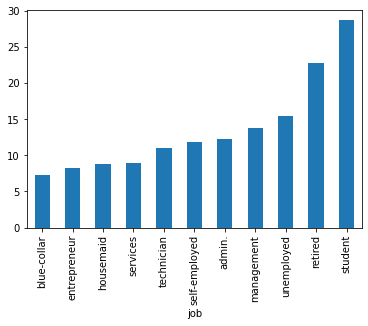

In [32]:
(ccp.groupby('job')['target'].mean()*100).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='marital'>

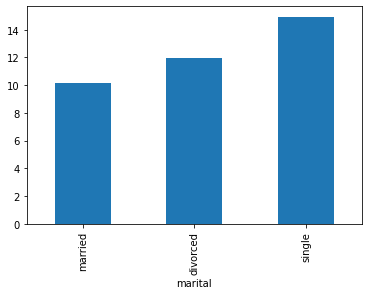

In [33]:
(ccp.groupby('marital')['target'].mean()*100).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='education_qual'>

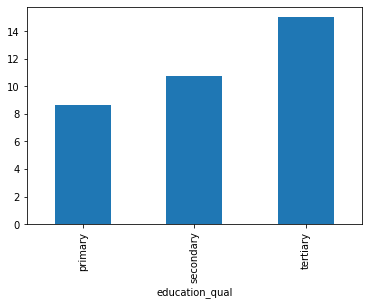

In [34]:
(ccp.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='call_type'>

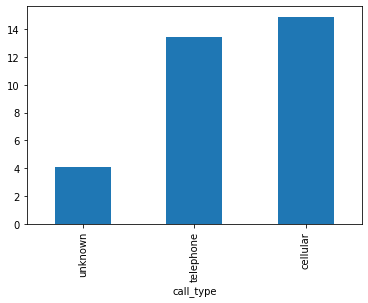

In [35]:
(ccp.groupby('call_type')['target'].mean()*100).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='mon'>

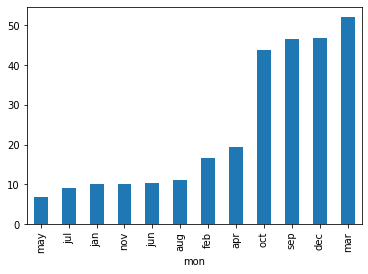

In [36]:
(ccp.groupby('mon')['target'].mean()*100).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='prev_outcome'>

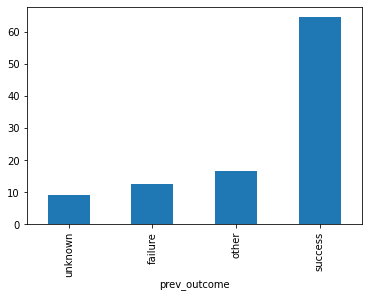

In [37]:
(ccp.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind = 'bar')

# Data Encoding

In [38]:
ccp = pd.get_dummies(ccp, columns=['job','marital','education_qual','call_type','mon','prev_outcome'])

In [39]:
ccp.y = ccp.y.map({'no': 0,'yes': 1})

In [40]:
ccp

,age,day,dur,num_calls,y,target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,5,261,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,5,151,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,5,76,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,5,92,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5,35,5,139,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,17,456,2,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,17,1127,5,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,17,508,4,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


<AxesSubplot:ylabel='y'>

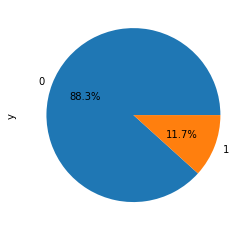

In [41]:
ccp.y.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [42]:
ccp.isnull().sum()

age                         0
day                         0
dur                         0
num_calls                   0
y                           0
target                      0
job_admin.                  0
job_blue-collar             0
job_entrepreneur            0
job_housemaid               0
job_management              0
job_retired                 0
job_self-employed           0
job_services                0
job_student                 0
job_technician              0
job_unemployed              0
marital_divorced            0
marital_married             0
marital_single              0
education_qual_primary      0
education_qual_secondary    0
education_qual_tertiary     0
call_type_cellular          0
call_type_telephone         0
call_type_unknown           0
mon_apr                     0
mon_aug                     0
mon_dec                     0
mon_feb                     0
mon_jan                     0
mon_jul                     0
mon_jun                     0
mon_mar   

In [43]:
ccp = ccp.rename(columns= ({'job_admin.':'job_admin'}))

In [44]:
ccp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44923 entries, 0 to 45210
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       44923 non-null  int64
 1   day                       44923 non-null  int64
 2   dur                       44923 non-null  int64
 3   num_calls                 44923 non-null  int64
 4   y                         44923 non-null  int64
 5   target                    44923 non-null  int64
 6   job_admin                 44923 non-null  uint8
 7   job_blue-collar           44923 non-null  uint8
 8   job_entrepreneur          44923 non-null  uint8
 9   job_housemaid             44923 non-null  uint8
 10  job_management            44923 non-null  uint8
 11  job_retired               44923 non-null  uint8
 12  job_self-employed         44923 non-null  uint8
 13  job_services              44923 non-null  uint8
 14  job_student               44923 non-nu

In [45]:
ccp.drop('target', axis = 1, inplace = True)

In [46]:
ccp

,age,day,dur,num_calls,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,5,261,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,44,5,151,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,5,76,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,5,92,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,35,5,139,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,17,456,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,17,1127,5,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,17,508,4,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


# Data Splitting

In [47]:
X = ccp.drop('y',axis=1)
Y = ccp['y']

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
x_train.shape, x_test.shape

((33692, 40), (11231, 40))

In [49]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

Given unbalanced data shape 44923
Resamble balanced data shape 79336


<AxesSubplot:ylabel='y'>

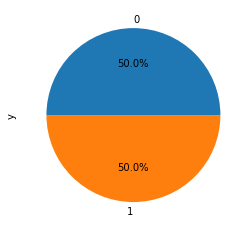

In [50]:
x_smt, y_smt= smt.fit_resample(X,Y)
print('Given unbalanced data shape', len(ccp))
print('Resamble balanced data shape', len(y_smt))
ccp_balanced = pd.DataFrame(x_smt, columns=list(i for i in list(ccp.describe(include='all').columns) if i != 'y'))
ccp_balanced['y'] = y_smt
ccp_balanced.y.value_counts().plot(kind='pie', autopct='%1.1f%%')

# Model Fitting

Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [52]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
lr.score(x_test,y_test)

0.8989404327308343

# Data Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
tr_x_train = ss.transform(x_train)
tr_x_test = ss.transform(x_test)

KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in range(1,11):
  knn = KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10)))

K value  :  1  train score :  1.0  score :  0.8499050603644859
K value  :  2  train score :  0.9187640983022676  score :  0.8807432578237782
K value  :  3  train score :  0.9216431200284934  score :  0.8729075626699361
K value  :  4  train score :  0.9065059954885433  score :  0.8826724992139008
K value  :  5  train score :  0.9073964145791286  score :  0.8804168307125625
K value  :  6  train score :  0.9003324231271519  score :  0.8848393407160593
K value  :  7  train score :  0.9020835806719696  score :  0.8850470470417571
K value  :  8  train score :  0.8985219043096284  score :  0.8862047046160975
K value  :  9  train score :  0.8990561557639796  score :  0.8853142414737972
K value  :  10  train score :  0.8968301080375163  score :  0.8854032093983104


In [55]:
knn = KNeighborsClassifier(8)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.883091443326507

Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [57]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
dt.score(x_test,y_test)

0.897070608138189

Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 5, max_features='sqrt')
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
acc1 = roc_auc_score(y_test, predictions)
print("Test set auc: {:.2f}".format(acc1))

Test set auc: 0.54


In [61]:
roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])

0.9025778607175718

XG Boost

In [63]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
for log_reg in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.25,0.5,0.75,1]:
  model_xgb = xgb.XGBClassifier(learning_rate = log_reg, n_estimators=100, verbosity = 0)
  model_xgb.fit(x_train,y_train)
  model_xgb.score(x_test, y_test) 
  print("Learning rate : ", log_reg, " Train score : ", model_xgb.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model_xgb, x_train, y_train)))

Learning rate :  0.01  Train score :  0.9024397483082037  Cross-Val score :  0.9017572473127828
Learning rate :  0.02  Train score :  0.9022913451264395  Cross-Val score :  0.9016088177028131
Learning rate :  0.03  Train score :  0.9023507063991452  Cross-Val score :  0.9011338729019875
Learning rate :  0.04  Train score :  0.9030927223079663  Cross-Val score :  0.9008074502071051
Learning rate :  0.05  Train score :  0.9039237801258458  Cross-Val score :  0.9024992544163855
Learning rate :  0.06  Train score :  0.9048141992164312  Cross-Val score :  0.9034786942792694
Learning rate :  0.07  Train score :  0.9062982310340734  Cross-Val score :  0.903775540285498
Learning rate :  0.08  Train score :  0.9067434405793661  Cross-Val score :  0.9041316806152796
Learning rate :  0.09  Train score :  0.9072480113973643  Cross-Val score :  0.9044284605529558
Learning rate :  0.1  Train score :  0.9088507657604179  Cross-Val score :  0.9049923820756721
Learning rate :  0.25  Train score :  0.91

In [65]:
model_xgb = xgb.XGBClassifier(learning_rate = 0.25, n_estimators=100)
model_xgb.fit(x_train,y_train)
model_xgb.score(x_test, y_test)

0.907488202297213

Voting Classifier

In [66]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model1 = RandomForestClassifier(n_estimators= 100)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier(3)
model4 = xgb.XGBClassifier()
model5 = LogisticRegression()
model_vc = VotingClassifier(estimators=[('rf',model1),('dt', model2),('knn',model3),('xbg',model4),('lr',model5)])
model_vc.fit(x_train,y_train)
model_vc.score(x_test,y_test)

0.9029471997150743

# Conclusion

**Logistic Regression => 0.8989404327308343**

**KNN Classifier => 0.883091443326507**

**Decision Tree => 0.897070608138189**

**Random Forest => 0.9025778607175718**

**XG Boost => 0.917488202297213**

**Voting Classifier => 0.9029471997150743**